# Download and extract earthquakes data for deep learning model

In this notebook, I will extract earthqaukes records from a complex file that includes thousands subdirectories and records. Earthquakes data belogs to 2022. And there are many different channels in the records but for my 3 channel tensors, I want to extract only BHE, BHN, BHZ records. Let's do it...  

## Import Libraries

In [ ]:
# Instalation ObsPy
!pip install obspy

In [1]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import obspy
import random
import warnings

warnings.filterwarnings('ignore')

## Get data from google drive

In [2]:
# Make a connection with Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data exploration

In [ ]:
# Check out the earthquake files
main_directories = os.listdir('/content/drive/MyDrive/eartquakes_records/2002')
main_directories

['200204',
 '200205',
 '200206',
 '200207',
 '200208',
 '200209',
 '200210',
 '200211',
 '200212']

First 4 digits indicate the year 2022 while the last 2 digits months. As you can see from the above output, you can see that we have data only from April to December. First 3 months are missing. But its okay right now. Lets explore the how much data we have for each subdirectories.

In [ ]:
# Check out the first main subdirectory '200204'
os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{main_directories[0]}')

['20020430_120855-KIZILIRMAK-(CANKIRI).M=3.6', '20020430_234100_MAN']

In [ ]:
# Check out the second main subdirectory '200205'
os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{main_directories[1]}')

['20020501_104500_MAN',
 '20020501_123300_MAN',
 '20020502_111300_MAN',
 '20020503_021800_MAN',
 '20020504_232600_MAN',
 '20020505_092100_MAN',
 '20020505_093900_MAN',
 '20020505_131200_MAN',
 '20020505_175300_MAN',
 '20020506_140800_MAN',
 '20020507_233000_MAN',
 '20020508_102300_MAN',
 '20020508_195600_MAN',
 '20020509_014900_MAN',
 '20020509_145200_MAN',
 '20020509_151800_MAN',
 '20020509_151900_MAN',
 '20020509_220100_MAN',
 '20020509_220200_MAN',
 '20020511_022700_MAN',
 '20020511_073800_MAN',
 '20020511_075200_MAN',
 '20020511_094000_MAN',
 '20020511_160900_MAN',
 '20020512_233300_MAN',
 '20020513_114200_MAN',
 '20020513_124800_MAN',
 '20020513_140600_MAN',
 '20020513_152700_MAN',
 '20020513_213900_MAN',
 '20020513_214000_MAN',
 '20020514_040700_MAN',
 '20020514_081200_MAN',
 '20020514_105800_MAN',
 '20020514_193200_MAN',
 '20020514_195400_MAN',
 '20020514_211900_MAN',
 '20020514_220100_MAN',
 '20020514_224100_MAN',
 '20020515_085400_MAN',
 '20020515_153500_MAN',
 '20020516_04050

Actually, there are some information in the subdirectory file names like below:

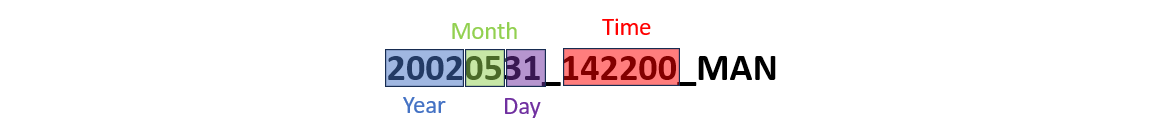

In [ ]:
# How many subdirectory I have for each main subdirectory?
for i in main_directories:
  print(f"Month: {i[-2:]},\
  Total subdirectories: {len(os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}'))}")

Month: 04,  Total subdirectories: 2
Month: 05,  Total subdirectories: 109
Month: 06,  Total subdirectories: 186
Month: 07,  Total subdirectories: 230
Month: 08,  Total subdirectories: 251
Month: 09,  Total subdirectories: 242
Month: 10,  Total subdirectories: 352
Month: 11,  Total subdirectories: 321
Month: 12,  Total subdirectories: 300


Now, we are looking for the subdirectories but I wonder how much records we have for each months.

In [ ]:
# Calculate the all files for the
for i in main_directories:
  # Get the subdirectories
  sub_dirs = os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}')
  # Calculate the all file
  total_records = sum([len(os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}/{j}')) for j in sub_dirs])
  print(f"Month: {i[-2:]},\
  Total records: {total_records}")

Month: 04,  Total records: 29
Month: 05,  Total records: 1399
Month: 06,  Total records: 1949
Month: 07,  Total records: 2463
Month: 08,  Total records: 3255
Month: 09,  Total records: 2903
Month: 10,  Total records: 4141
Month: 11,  Total records: 4447
Month: 12,  Total records: 2652


Let's check out a subdirectory that includes some records.

In [ ]:
# Check out a sample subdir
sample_subdir = os.listdir('/content/drive/MyDrive/eartquakes_records/2002/200205/20020508_195600_MAN')
sample_subdir

['YLVX.BHZ.KO',
 'YLVX.BHN.KO',
 'YLVX.BHE.KO',
 'YLV.SHZ.KO',
 'YER.SHZ.KO',
 'VANB.BHZ.KO',
 'VANB.BHN.KO',
 'TOS.SHZ.KO',
 'TOK.SHZ.KO',
 'MYA.SHZ.KO',
 'MUD.SHZ.KO',
 'MRMX.BHZ.KO',
 'MRMX.BHN.KO',
 'MFTX.BHZ.KO',
 'KVT.SHZ.KO',
 'KON.SHZ.KO',
 'KGT.SHZ.KO',
 'CTTX.BHE.KO',
 'CTT.SHZ.KO',
 'CEY.SHZ.KO',
 'BTM.SHZ.KO',
 'BOY.SHZ.KO',
 'BNN.SHZ.KO',
 'BALB.BHZ.KO',
 'BALB.BHN.KO',
 'BNT.SHZ.KO',
 'BALB.BHE.KO',
 'ALT.SHZ.KO',
 'ELL.SHZ.KO',
 'GAZ.SHZ.KO',
 'EDRB.BHN.KO',
 'DST.SHZ.KO',
 'GPA.SHZ.KO',
 'HRT.SHZ.KO',
 'CTTX.BHZ.KO',
 'CTTX.BHN.KO',
 'IZM.SHZ.KO',
 'ISKB.BHN.KO',
 'EDRB.BHZ.KO',
 'ISKB.BHE.KO',
 'HTY.SHZ.KO',
 'KAM.SHZ.KO',
 'ISKB.BHZ.KO']

There are lots of data in here from different station and channels. But as I said before I want to get BHE, BHN and BHZ channels. Due to this, I need to walk through each subdirectory and extract the records. Then, I will save all of them another directory.

In [ ]:
# Creating an empty list for BHE, BHN and BHZ
all_b_channels = []

# Calculate the all files for the
for i in main_directories:
  # Get the subdirectories
  sub_dirs = os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}')
  # For loops for records
  for j in sub_dirs:
    records = os.listdir(f'/content/drive/MyDrive/eartquakes_records/2002/{i}/{j}')
    # Get the BHZ, BHE and BHN channels
    b_channels = [k for k in records if 'BHZ' in k or 'BHE' in k or 'BHN' in k]
    # Creating default dictionary for grouping BHE, BHZ and BHN
    grouped_data = defaultdict(list)
    # For loop for grouping data
    for item in b_channels:
        prefix = item.split('.')[0]
        grouped_data[prefix].append(f'/content/drive/MyDrive/eartquakes_records/2002/{i}/{j}/{item}')
    results = [m for m in list(grouped_data.values()) if len(m) > 2]
    if len(results) > 0:
      for sub in results:
        all_b_channels.append(sub)

In [ ]:
# Check out the first 10 all_b_channels
all_b_channels[:10]

[['/content/drive/MyDrive/eartquakes_records/2002/200205/20020501_104500_MAN/YLVX.BHZ.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020501_104500_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020501_104500_MAN/YLVX.BHE.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200205/20020504_232600_MAN/YLVX.BHZ.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020504_232600_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020504_232600_MAN/YLVX.BHE.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/YLVX.BHZ.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/YLVX.BHE.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/MRMX.BHZ.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200205/20020505_092100_MAN/MRMX.BHN.K

In [ ]:
# Order the each 3 channel as BHE, BHN and BHZ
all_b_channels = [sorted(i) for i in all_b_channels]
all_b_channels[-10:]

[['/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/YLVX.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/YLVX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/YLVX.BHZ.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/MRMX.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/MRMX.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/MRMX.BHZ.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/ISKB.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/ISKB.BHN.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/ISKB.BHZ.KO'],
 ['/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/EDRB.BHE.KO',
  '/content/drive/MyDrive/eartquakes_records/2002/200212/20021230_102400_MAN/EDRB.BHN.K

In the end, we got all the B channels in a group for three directions. The next step is to store all records in an orderly format within a new directory.

In [ ]:
import shutil

# Copy records into new directory with new record name
for data in all_b_channels:
  for record in data:
    # print(record)
    # Create a new record name with date and time
    record_name = '_'.join(record.split('/')[-2:])
    # Define the destination path
    destination_path = f"/content/drive/MyDrive/eartquakes_records/2002_ordered/{record_name}"
    # Copy the record
    shutil.copy(record, destination_path)

In [3]:
# Check out the first 10 records from the new directory
earthquake_records = os.listdir('/content/drive/MyDrive/eartquakes_records/2002_ordered')
earthquake_records[:10]

['20021108_143100_MAN_CTTX.BHZ.KO',
 '20021109_021900_MAN_YLVX.BHE.KO',
 '20021109_021900_MAN_YLVX.BHN.KO',
 '20021109_021900_MAN_YLVX.BHZ.KO',
 '20021109_021900_MAN_MFTX.BHE.KO',
 '20021109_021900_MAN_MFTX.BHN.KO',
 '20021109_021900_MAN_MFTX.BHZ.KO',
 '20021109_021900_MAN_ISKB.BHE.KO',
 '20021109_021900_MAN_ISKB.BHN.KO',
 '20021109_021900_MAN_ISKB.BHZ.KO']

In [4]:
# How many record we have?
len(earthquake_records)

5436

Each earthquakes have 3 channels so if we want to check out the how many record we have, we should divide 3 the total record.

In [ ]:
# How many earthquake we have?
len(earthquake_records) / 3

1812.0

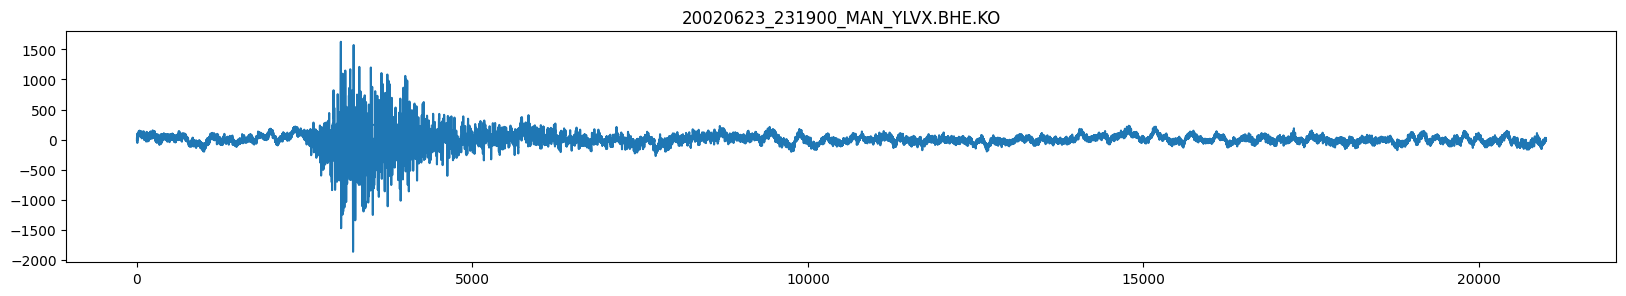

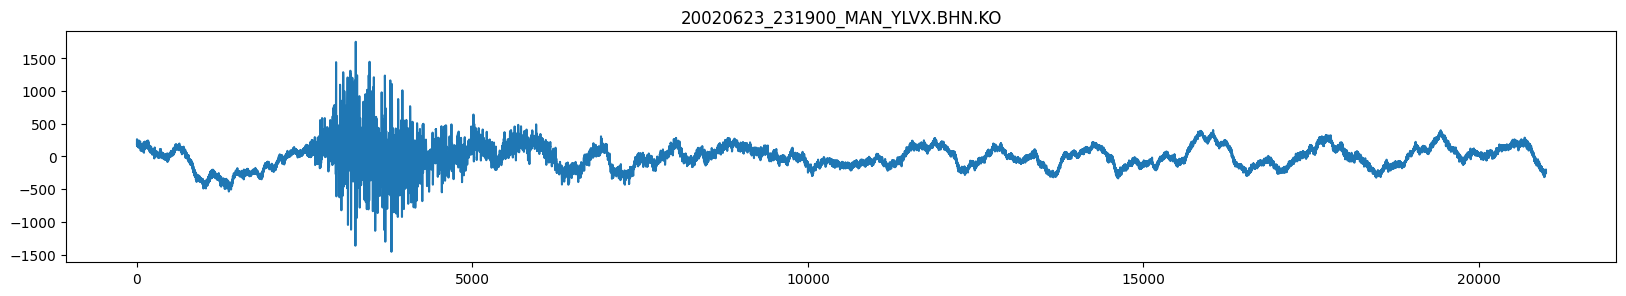

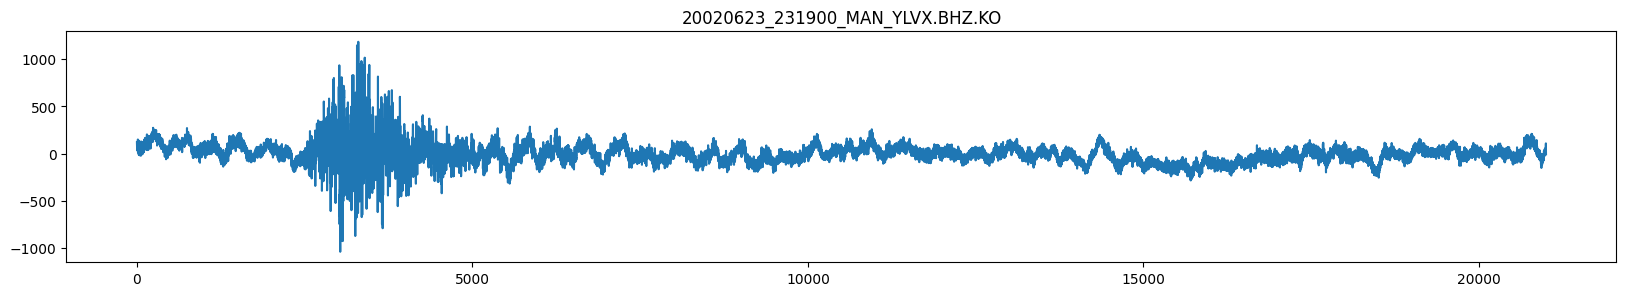

In [5]:
# Let's plot a random earthquake data with 3 channels
random_number = random.choice(range(3, len(earthquake_records)-3, 3))

for i in earthquake_records[random_number:random_number+3]:
  plt.figure(figsize=(20, 3))
  st = obspy.read(f'/content/drive/MyDrive/eartquakes_records/2002_ordered/{i}')
  plt.plot(st[0].data)
  plt.title(i)
  plt.show()